# Supervised Machine Learning: Logistic Regression

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## 1. Load Data

In [7]:
spector_data = sm.datasets.spector.load_pandas().data

In [11]:
spector_data.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


## 2. Logistic Regression

Logistic Regression is used when the dependent variable (target) is categorical.
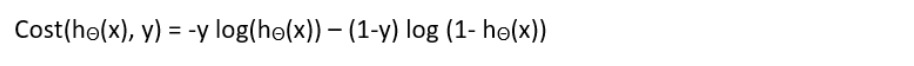
This implementation is for binary logistic regression. For data with more than 2 classes, softmax re gression has to be used.


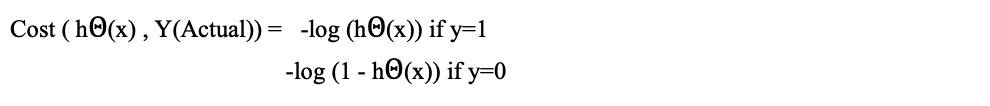

In [18]:
X = spector_data[['GPA', 'TUCE', 'PSI']]
y = np.ravel(spector_data[['GRADE']])

In [28]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.586580
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.088  
Dependent Variable: y                AIC:              43.5411
Date:               2020-06-21 13:44 BIC:              47.9384
No. Observations:   32               Log-Likelihood:   -18.771
Df Model:           2                LL-Null:          -20.592
Df Residuals:       29               LLR p-value:      0.16184
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
GPA      0.2993     0.6815    0.4392   0.6605   -1.0365   1.6351
TUCE    -0.1015     0.0996   -1.0192   0.3081   -0.2966   0.0937
PSI      1.6364     0.8126    

Looking at the p-values we keep only the ones that are lower than 0.5

## 3. Logistic Regression Model Fitting

In [29]:
X = X[['PSI']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


## 4. Metrics

* Precision: tp / (tp + fp). The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

* Recall: tp / (tp + fn). The recall is intuitively the ability of the classifier to find all the positive samples.

* F-beta score: weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7 0]
 [3 0]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82         7
         1.0       1.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.85      0.50      0.41        10
weighted avg       0.79      0.70      0.58        10

